# Laboratorio 2 - Agrupación

### Integrantes

1. Cesar Avellaneda, 202214746, c.avellanedac@uniandes.edu.co.
2. Santiago Tinjaca, 202215991, s.tinjaca@uniandes.edu.co.
3. Jorge Bustamante, 202210581, j.bustamantep@uniandes.edu.co.

Este notebook tiene los siguientes elementos: 
1. Cargue de los datos.

2. Entendimiento de los datos: Describir las características más relevantes de los datos y todo el perfilamiento de datos, incluir el análisis de calidad de datos y hacer una preselección de las variables más importantes para la etapa de modelado.

3. Preparación de datos: Solucionar los problemas de calidad de datos previamente identificados que afecten el modelo a construir. Además, debe aplicar todos los proceso de preprocesamiento de datos necesarios para la construcción del modelo de agrupación.

4. Modelado: Utilizando las variables previamente seleccionadas, construir un modelo de agrupación que tenga siluetas cercanas a 1.

5. Evaluación cuantitativa: A partir de las métricas seleccionadas para evaluar y seleccionar el mejor modelo, explicar el resultado obtenido desde el punto de vista cuantitativo. Contestar a la pregunta: ¿Su equipo recomienda utilizar en producción el modelo de agrupación para optimizar tiempos? ¿Por qué? En caso de no recomendar el uso del modelo, ¿qué recomendaciones haría para continuar iterando con el objetivo de la construcción de un mejor modelo?

6. Evaluación cualitativa: Interpretación de los grupos obtenidos y relación entre estos y el objetivo de la organización. Verificar si es posible usar los datos obtenidos para optimizar la toma de decisiones.

### Entendimiento del negocio:
El caso de estudio es de un hospital que haciendo uso de la metodología KTAS quiere solicitar un modelo que pueda agrupar pacientes por ciertas características en común y le ayude al hospital a optimizar sus tiempos de respuesta.
### Enfoque Analítico:
En este laboratorio vamos a hacer un modelo predictivo usando un aprendizaje supervisado y un modelo de agrupación para hacer uso de las condiciones de llegada de los pacientes y optimizar las decisiones tomadas.

### 1. Carga de datos

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

In [171]:
datos=pd.read_csv('./data/202420_Laboratorio 2 - Agrupación_202420_Laboratorio_2_-_Agrupación_data.csv', sep=',', encoding = 'utf-8')

### 2. Entendimiento de los datos

#### 2.1 Perfilamiento de los datos

In [172]:
datos.shape

(1000, 23)

In [173]:
datos.dtypes

Grupo                         int64
Sexo                          int64
Edad                          int64
Modo_Llegada                  int64
Lesion                        int64
Queja_Principal              object
Estado_Mental                 int64
Dolor                         int64
dolor_NRS                    object
SBP                         float64
DBP                         float64
HR                          float64
RR                          float64
BT                          float64
Saturacion                  float64
KTAS_enfermera                int64
Diagnostico_En_Urgencias     object
Disposicion                   int64
KTAS_experto                  int64
Grupo_De_Error                int64
Duracion_Estancia_Min         int64
Duracion_KTAS_Min            object
Error_Triaje                  int64
dtype: object

In [174]:
datos.sample(5)

,Grupo,Sexo,Edad,Modo_Llegada,Lesion,Queja_Principal,Estado_Mental,Dolor,dolor_NRS,SBP,...,BT,Saturacion,KTAS_enfermera,Diagnostico_En_Urgencias,Disposicion,KTAS_experto,Grupo_De_Error,Duracion_Estancia_Min,Duracion_KTAS_Min,Error_Triaje
303,2,2,25,3,2,lip laceration,1,1,3,110.0,...,36.0,97.0,5,Open wound of lip,1,5,0,98,"2,00",0
65,2,1,69,3,1,Urinary frequency,1,0,#BOÞ!,150.0,...,36.8,98.0,4,Dysuria,1,4,0,268,"4,00",0
52,1,1,22,2,1,abd pain,1,1,3,96.0,...,37.0,NaN,4,Acute gastritis,1,4,0,156,"8,00",0
732,2,1,55,4,2,post neck pain,1,1,4,130.0,...,36.2,96.0,2,Closed fracture of second cervical vertebra,2,2,0,399,"3,00",0
417,1,2,57,2,1,dizziness,1,0,#BOÞ!,152.0,...,36.2,NaN,5,Dizziness,1,5,0,140,"9,67",0


In [175]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Grupo                     1000 non-null   int64  
 1   Sexo                      1000 non-null   int64  
 2   Edad                      1000 non-null   int64  
 3   Modo_Llegada              1000 non-null   int64  
 4   Lesion                    1000 non-null   int64  
 5   Queja_Principal           1000 non-null   object 
 6   Estado_Mental             1000 non-null   int64  
 7   Dolor                     1000 non-null   int64  
 8   dolor_NRS                 1000 non-null   object 
 9   SBP                       983 non-null    float64
 10  DBP                       979 non-null    float64
 11  HR                        988 non-null    float64
 12  RR                        985 non-null    float64
 13  BT                        989 non-null    float64
 14  Saturacio

In [176]:
datos.describe()

,Grupo,Sexo,Edad,Modo_Llegada,Lesion,Estado_Mental,Dolor,SBP,DBP,HR,RR,BT,Saturacion,KTAS_enfermera,Disposicion,KTAS_experto,Grupo_De_Error,Duracion_Estancia_Min,Error_Triaje
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,983.000000,979.000000,988.000000,985.000000,989.000000,444.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.450000,1.514000,53.892000,2.811000,1.2000,1.103000,0.562000,133.485249,79.566905,84.400810,19.450761,36.562993,97.047297,3.328000,1.610000,3.260000,0.569000,12792.480000,0.253000
std,0.497743,0.500054,19.826483,0.796186,0.4002,0.431946,0.496389,27.156136,15.174593,16.297428,2.069882,0.519699,4.761112,0.862067,1.161572,0.865534,1.587375,87721.151446,0.630387
min,1.000000,1.000000,16.000000,1.000000,1.0000,1.000000,0.000000,50.000000,31.000000,32.000000,14.000000,35.000000,20.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,36.000000,2.000000,1.0000,1.000000,0.000000,114.000000,70.000000,73.000000,18.000000,36.200000,97.000000,3.000000,1.000000,3.000000,0.000000,132.750000,0.000000
50%,1.000000,2.000000,56.000000,3.000000,1.0000,1.000000,1.000000,130.000000,80.000000,82.000000,20.000000,36.500000,98.000000,3.000000,1.000000,3.000000,0.000000,270.500000,0.000000
75%,2.000000,2.000000,70.250000,3.000000,1.0000,1.000000,1.000000,150.000000,90.000000,96.000000,20.000000,36.800000,99.000000,4.000000,2.000000,4.000000,0.000000,620.000000,0.000000
max,2.000000,2.000000,94.000000,7.000000,2.0000,4.000000,1.000000,275.000000,160.000000,148.000000,30.000000,39.800000,100.000000,5.000000,7.000000,5.000000,9.000000,709510.000000,2.000000


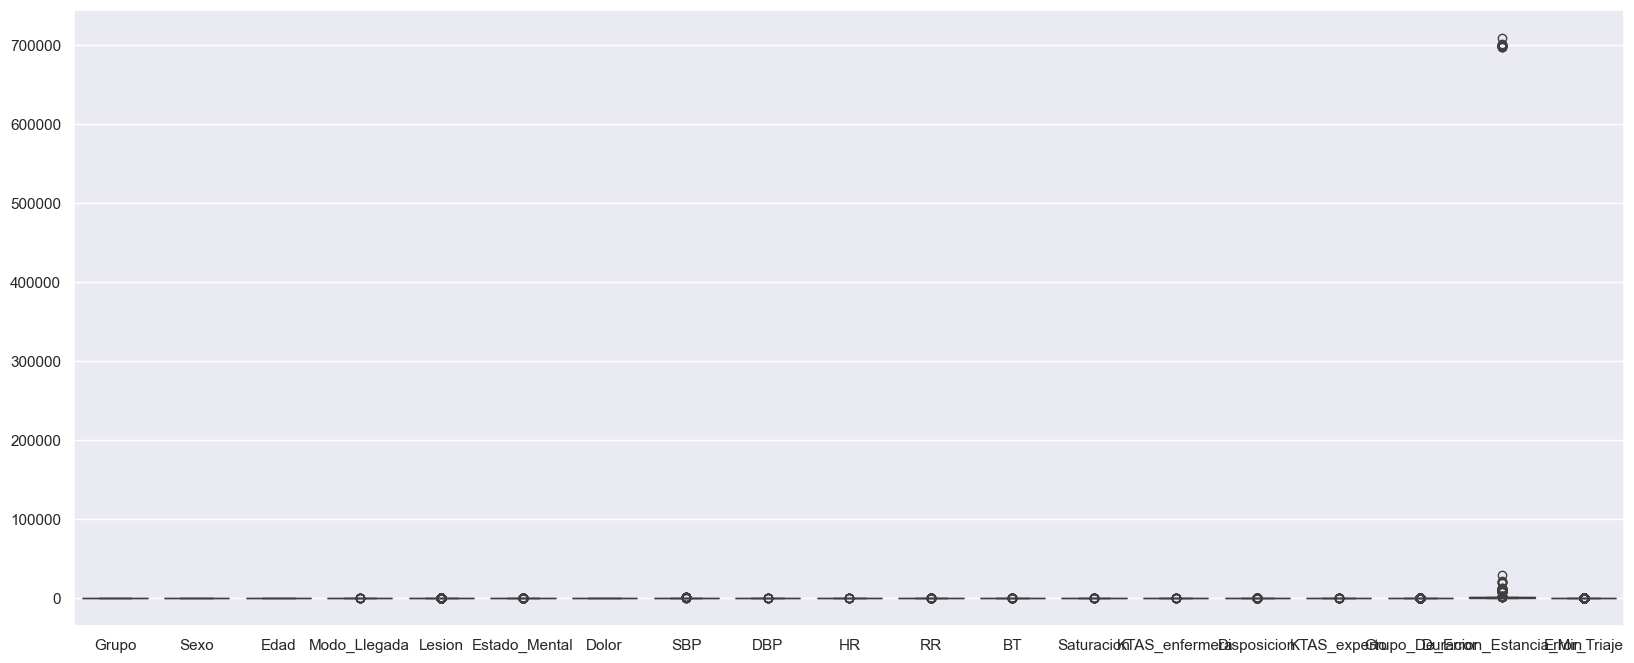

In [177]:
#Visualización de todas las variables numéricas
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=datos, orient="v")

In [178]:
datos["Lesion_stan"]=datos["Lesion"].apply(lambda x:0 if x == 2 else x)
datos["Lesion_stan"].value_counts()
name_cols_float = datos.select_dtypes(include = ['float']).columns
name_cols_int = datos.select_dtypes(include = ['int64']).columns
name_cols_int

Index(['Grupo', 'Sexo', 'Edad', 'Modo_Llegada', 'Lesion', 'Estado_Mental',
       'Dolor', 'KTAS_enfermera', 'Disposicion', 'KTAS_experto',
       'Grupo_De_Error', 'Duracion_Estancia_Min', 'Error_Triaje',
       'Lesion_stan'],
      dtype='object')

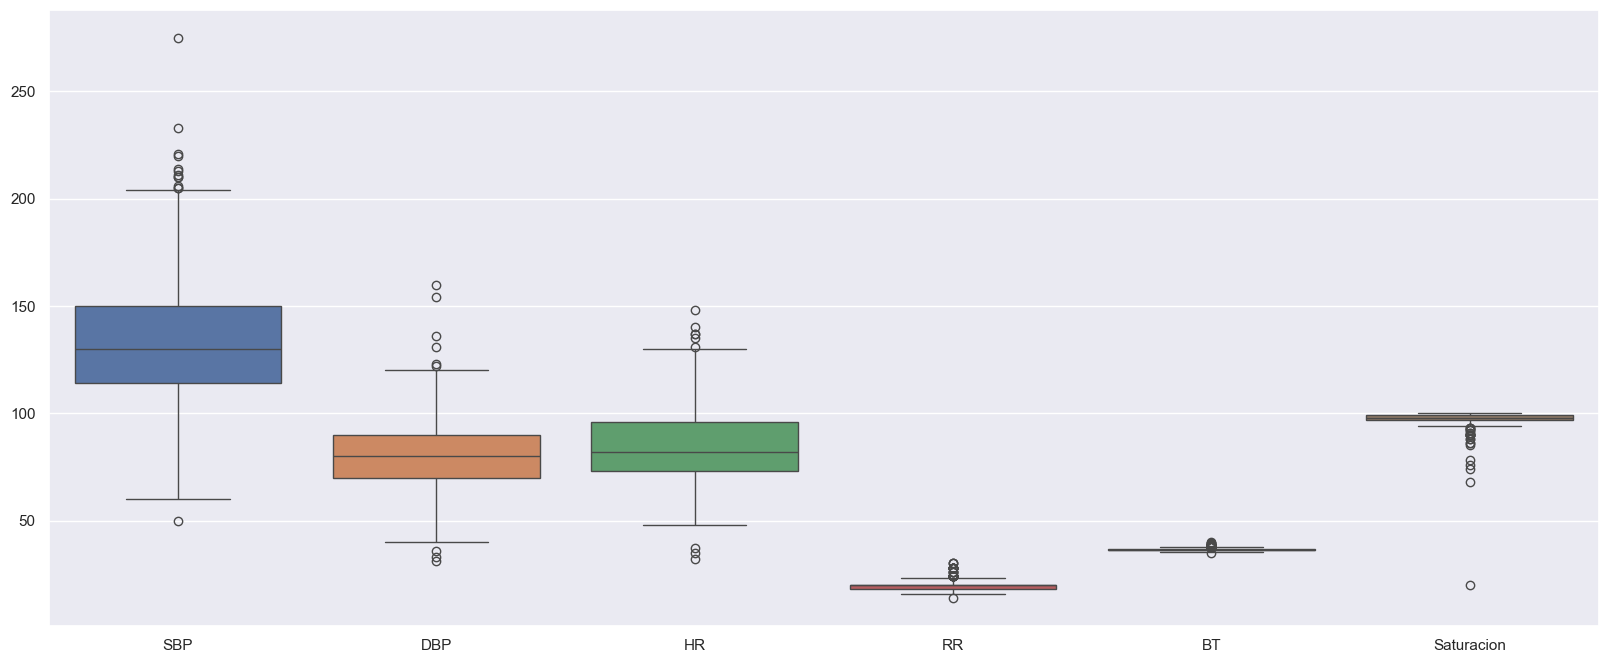

In [179]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=datos[name_cols_float], orient="v")

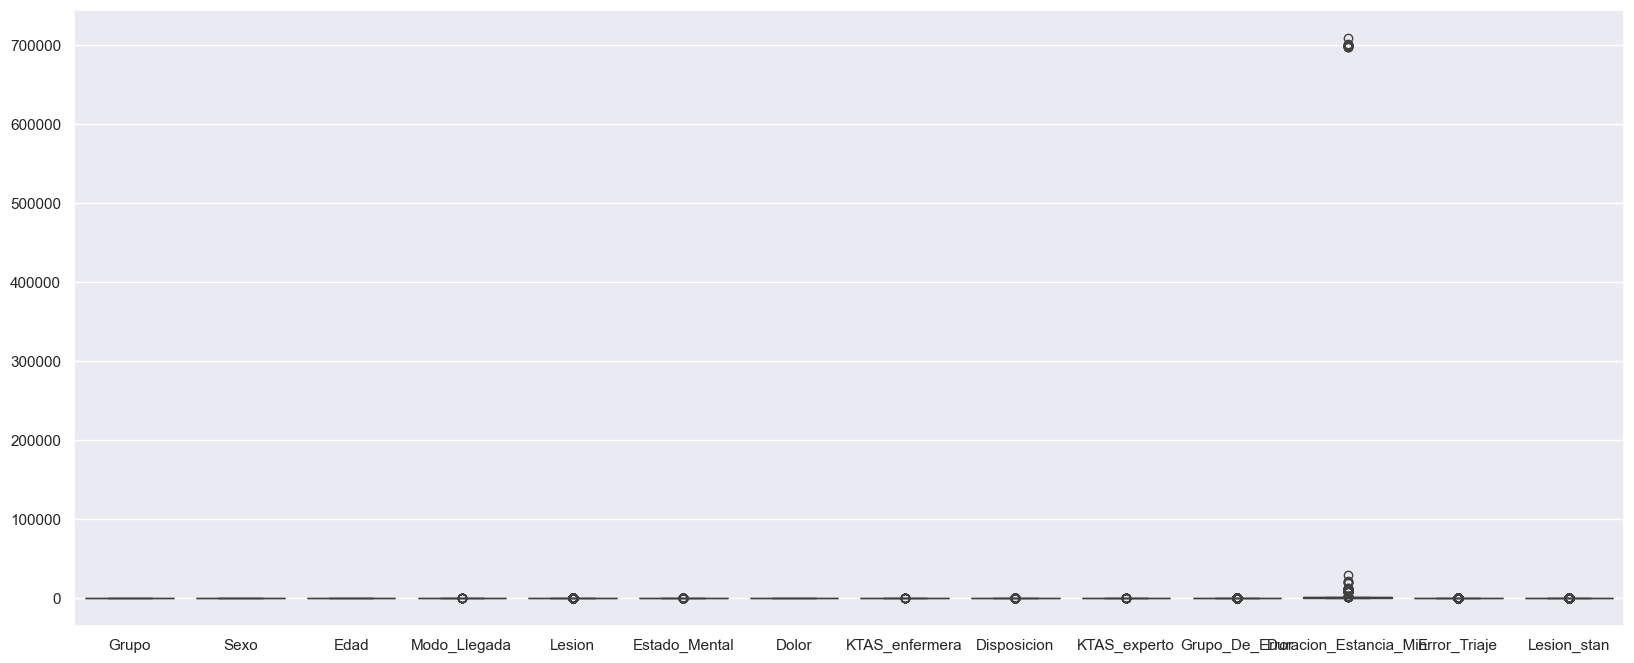

In [180]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=datos[name_cols_int], orient="v")

In [181]:
name_cols_non_number = datos.select_dtypes(include = ['object']).columns
name_cols_non_number

Index(['Queja_Principal', 'dolor_NRS', 'Diagnostico_En_Urgencias',
       'Duracion_KTAS_Min'],
      dtype='object')

In [182]:
datos.Queja_Principal.sample(10)

181                    headache
429              Rt hemiparesis
19             PTBD malfunction
287           Gingival bleeding
900          voiding difficulty
477        upper abdominal pain
544                     seizure
524               both leg pain
14     diffuse chest discomfort
918                    abd pain
Name: Queja_Principal, dtype: object

In [183]:
datos[name_cols_non_number].describe()

,Queja_Principal,dolor_NRS,Diagnostico_En_Urgencias,Duracion_KTAS_Min
count,1000,1000,999,1000
unique,347,11,489,335
top,abd pain,#BOÞ!,Acute gastroenteritis,"2,00"
freq,62,440,39,133


In [184]:
datos[name_cols_non_number].sample(15)

,Queja_Principal,dolor_NRS,Diagnostico_En_Urgencias,Duracion_KTAS_Min
533,epigastric pain,2,Obstructive ileus NOS,"4,00"
567,fever,#BOÞ!,"Viral infection, unspecified","2,00"
604,dizziness,3,Dizziness and giddiness,"2,00"
706,fever,#BOÞ!,Acute pyelonephritis,"9,67"
545,mental change,#BOÞ!,Traumatic subdural hemorrhage without open int...,"2,00"
363,post neck pain,3,"Superficial injury of head, part unspecified, ...","3,00"
71,Open Wound,3,"Open wound of head, part unspecified","4,00"
160,eye discomfort,#BOÞ!,Corneal erosion,"3,45"
20,dizziness,#BOÞ!,Dizziness,"5,38"
619,ant. chest pain,5,Unstable angina,"2,00"


### 2.2 Análisis de calidad de datos

#### 2.2.1 Análisis de completitud

In [185]:
datos.isnull().sum() / datos.shape[0]

Grupo                       0.000
Sexo                        0.000
Edad                        0.000
Modo_Llegada                0.000
Lesion                      0.000
Queja_Principal             0.000
Estado_Mental               0.000
Dolor                       0.000
dolor_NRS                   0.000
SBP                         0.017
DBP                         0.021
HR                          0.012
RR                          0.015
BT                          0.011
Saturacion                  0.556
KTAS_enfermera              0.000
Diagnostico_En_Urgencias    0.001
Disposicion                 0.000
KTAS_experto                0.000
Grupo_De_Error              0.000
Duracion_Estancia_Min       0.000
Duracion_KTAS_Min           0.000
Error_Triaje                0.000
Lesion_stan                 0.000
dtype: float64

#### 2.2.2 Unicidad

No podemos eliminar los datos sin más porque nada nos asegura que sean duplicados, puede ser que hayan dos pacientes que tengan los mismos problemas al momento de llegar al hospital.

In [186]:
datos.duplicated(keep = False).sum()

np.int64(66)

#### 2.2.3 Consistencia

In [187]:
datos.Estado_Mental.value_counts()

Estado_Mental
1    936
2     33
3     23
4      8
Name: count, dtype: int64

In [188]:
#Visualización de la variable dolor registrado por la enfermera
datos.dolor_NRS.value_counts()

dolor_NRS
#BOÞ!    440
3        209
4        111
5        109
6         59
2         31
7         27
8          8
10         3
1          2
9          1
Name: count, dtype: int64

In [189]:
datos.KTAS_experto.value_counts()

KTAS_experto
3    391
4    369
2    171
5     50
1     19
Name: count, dtype: int64

Como podemos observar, dolor_NRS tiene un problema. Hay datos con el valor #BOÞ!, los cuales representan una gran cantida del total.

#### 2.2.4 Validez

In [190]:
datos['KTAS_experto'].unique()

array([2, 3, 4, 1, 5])

In [191]:
datos['dolor_NRS'].unique()

array(['2', '4', '3', '#BOÞ!', '6', '5', '7', '8', '1', '9', '10'],
      dtype=object)

In [192]:
datos['Estado_Mental'].unique()

array([1, 4, 2, 3])

Como podemos observar, la validez de estos datos es correcta, el único problema como mencionamos anteriormente está en dolor_NRS

### 3. Preparación de datos

Dato que los datos atipicos de duración de instancia en minutos están bastante arriba a diferencia de los demás registros, decidimos escoger solo los datos que están por debajo de 850. 

In [193]:
datos=datos[datos["Duracion_Estancia_Min"]<=850]

In [194]:
def calcularEWS(registro):
    total = 0
    
    # Frecuencia respiratoria (RR)
    if registro['RR'] <= 8:
        total += 2
    elif 9 <= registro['RR'] <= 14:
        total += 0
    elif 15 <= registro['RR'] <= 20:
        total += 1
    elif 21 <= registro['RR'] <= 29:
        total += 2
    elif registro['RR'] >= 30:
        total += 3
    
    # Presión arterial sistólica (SBP)
    if registro['SBP'] <= 70:
        total += 3
    elif 71 <= registro['SBP'] <= 80:
        total += 2
    elif 81 <= registro['SBP'] <= 100:
        total += 1
    elif 101 <= registro['SBP'] <= 199:
        total += 0
    elif registro['SBP'] >= 200:
        total += 2

    # Frecuencia cardíaca (HR)
    if registro['HR'] <= 40:
        total += 2
    elif 41 <= registro['HR'] <= 50:
        total += 1
    elif 51 <= registro['HR'] <= 100:
        total += 0
    elif 101 <= registro['HR'] <= 110:
        total += 1
    elif 111 <= registro['HR'] <= 129:
        total += 2
    elif registro['HR'] >= 130:
        total += 3

    # Temperatura corporal (BT)
    if registro['BT'] < 35.0:
        total += 2
    elif 35.0 <= registro['BT'] <= 38.4:
        total += 0
    elif 38.5 <= registro['BT']:
        total += 2

    # Saturación de oxígeno (Saturacion)
    if registro['Saturacion'] <= 91:
        total += 3
    elif 92 <= registro['Saturacion'] <= 93:
        total += 2
    elif 94 <= registro['Saturacion'] <= 95:
        total += 1

    # Nivel de conciencia
    if registro['Estado_Mental'] == 1:
        total += 0
    elif registro['Estado_Mental'] == 2:
        total += 1
    elif registro['Estado_Mental'] == 3:
        total += 2
    elif registro['Estado_Mental'] == 4:
        total += 3
    return total

datos['EWS'] = datos.apply(calcularEWS, axis=1)
print(datos.head())

   Grupo  Sexo  Edad  Modo_Llegada  Lesion  Queja_Principal  Estado_Mental  \
1      2     2    30             4       1         headache              1   
2      2     1    61             3       2  ant. chest pain              1   
3      2     2    61             3       1         headache              1   
4      1     2    67             3       1    fever & chill              1   
6      1     1    74             3       1         abd pain              1   

   Dolor dolor_NRS    SBP  ...  KTAS_enfermera  \
1      1         4  140.0  ...               3   
2      1         3  100.0  ...               4   
3      1         4  120.0  ...               4   
4      0     #BOÞ!  143.0  ...               4   
6      1         6  118.0  ...               3   

                Diagnostico_En_Urgencias  Disposicion  KTAS_experto  \
1  Subarachnoid haemorrhage, unspecified            7             3   
2      Contusion of front wall of thorax            1             4   
3                

In [233]:
datos['EWS'].value_counts()

EWS
1    535
2    142
3     67
4     31
6      6
5      6
0      5
9      3
7      2
8      1
Name: count, dtype: int64

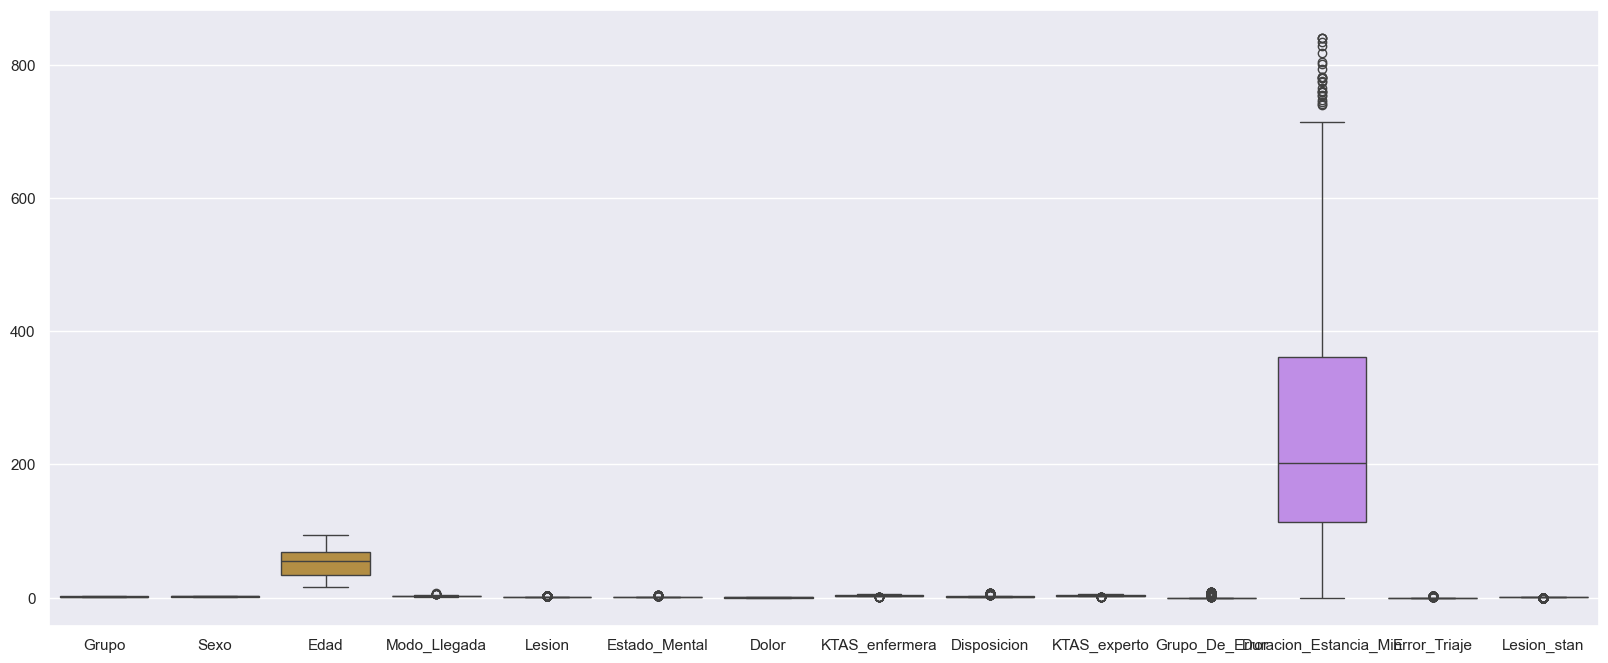

In [195]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=datos[name_cols_int], orient="v")

Se escogen las variables KTAS_experto, Estado_Mental y dolor_NRS porque se cree que podrían agrupar a los pacientes de una buena forma. Dado que la valoración dada por el experto puede relacionarse con el nivel de dolor y el estado mental en el que llega el paciente de manera que, si el dolor registrado por la enfermera es alto y el estado mental del paciente es malo, la valoración del experto será más o menos grave.

In [196]:

gravedad_dict = {
    1: 1,  # Alta a Domicilio
    2: 2,  # Admisión a Sala
    7: 3,  # Cirugía
    4: 4,  # Alta a otra Institución de Cuidados
    5: 5,  # Transferencia a otro Hospital
    3: 6,  # Admisión a UCI
    6: 7   # Muerte
}

# Crear una nueva columna con la gravedad ajustada
datos['gravedad'] = datos['Disposicion'].map(gravedad_dict)

datos['dolor_NRS'] = pd.to_numeric(datos['dolor_NRS'], errors='coerce')
datos['dolor_NRS'] = datos['dolor_NRS'].fillna(0)
datos["Duracion_KTAS_Min"] = datos["Duracion_KTAS_Min"].str.replace(',', '.').astype('float64')


In [197]:

name_cols = ['KTAS_experto', 'EWS' ,'dolor_NRS']
datos_cols_selec = datos[name_cols].copy()
datos_cols_selec.describe()


,KTAS_experto,EWS,dolor_NRS
count,798.000000,798.000000,798.000000
mean,3.347118,1.577694,2.390977
std,0.861011,1.112653,2.359746
min,1.000000,0.000000,0.000000
25%,3.000000,1.000000,0.000000
50%,3.000000,1.000000,3.000000
75%,4.000000,2.000000,4.000000
max,5.000000,9.000000,10.000000


Problemas de calidad:

Primero el dolor reportado por la enfermera, el cual tiene un 44% de sus entradas en null.
Nos dimos cuenta de que estas se correspondían cuando el paciente no tenía dolor, por lo que las asignamos a 0.

In [198]:

datos_cols_selec = datos_cols_selec.reset_index(drop=True)
datos_cols_selec.describe()


,KTAS_experto,EWS,dolor_NRS
count,798.000000,798.000000,798.000000
mean,3.347118,1.577694,2.390977
std,0.861011,1.112653,2.359746
min,1.000000,0.000000,0.000000
25%,3.000000,1.000000,0.000000
50%,3.000000,1.000000,3.000000
75%,4.000000,2.000000,4.000000
max,5.000000,9.000000,10.000000


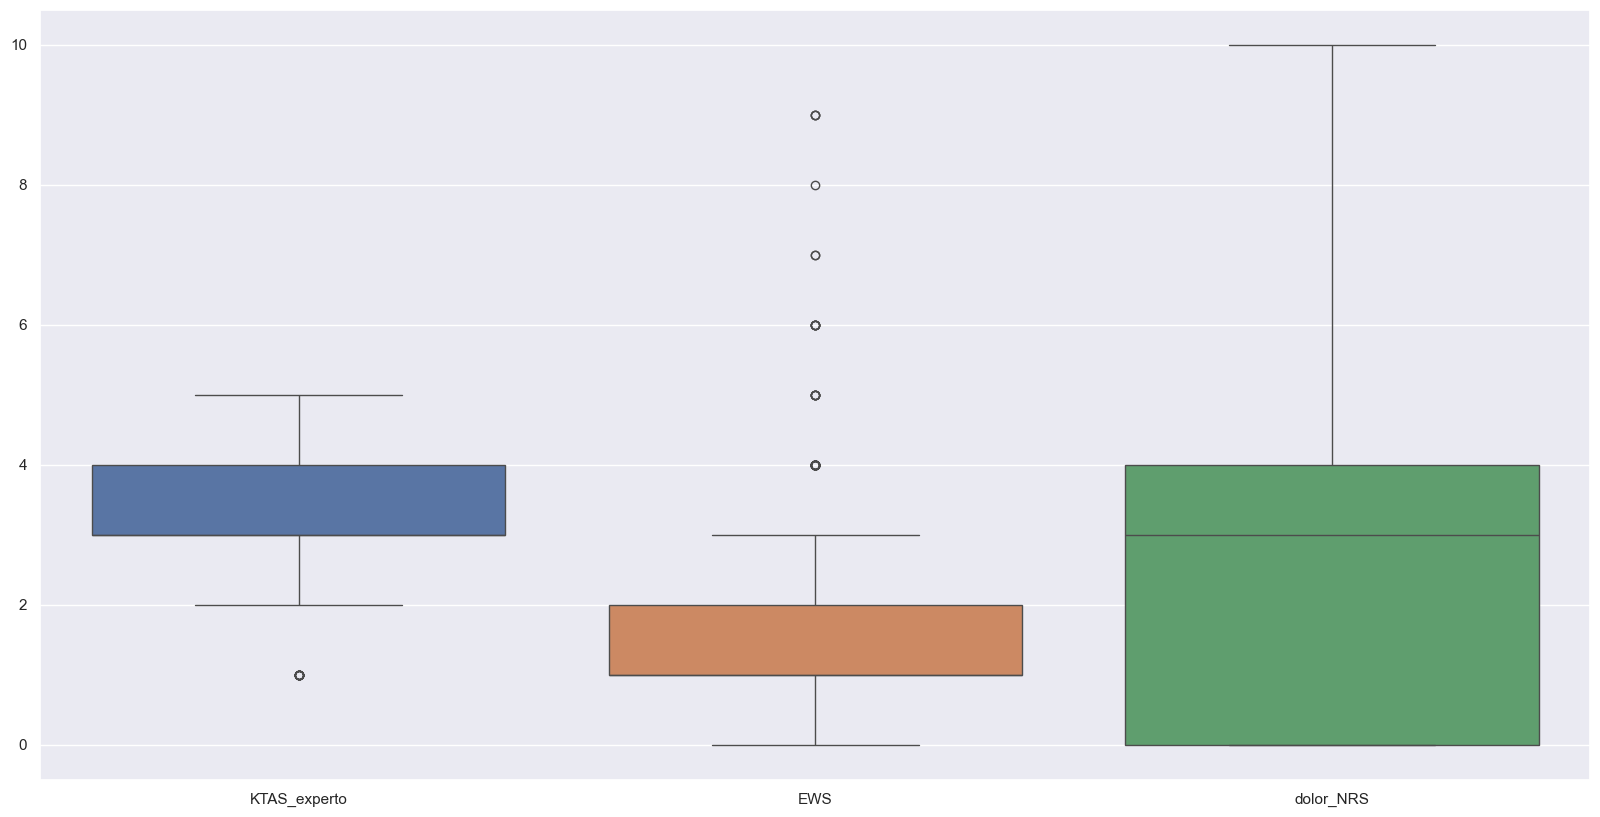

In [199]:
fig=plt.figure(figsize=(20,10))
ax = sns.boxplot(data=datos_cols_selec, orient="v")

In [200]:
# sns.pairplot(data=datos_cols_selec, hue="dolor_NRS")

### 4. Modelamiento e hiperparámetros

In [201]:
mms = MinMaxScaler()


datos_prep_norm = datos_cols_selec.copy()
datos_prep_norm[name_cols] = mms.fit_transform(datos_cols_selec[name_cols])
datos_prep_norm=datos_prep_norm[name_cols]
saved_cols = datos_prep_norm.columns

datos_prep_norm = pd.DataFrame(datos_prep_norm, columns =saved_cols)
print(datos_prep_norm.head())

   KTAS_experto       EWS  dolor_NRS
0          0.50  0.111111        0.4
1          0.75  0.222222        0.3
2          0.50  0.111111        0.4
3          0.25  0.444444        0.0
4          0.50  0.111111        0.6


In [202]:
datos_prep_norm.describe()

,KTAS_experto,EWS,dolor_NRS
count,798.000000,798.000000,798.000000
mean,0.586779,0.175299,0.239098
std,0.215253,0.123628,0.235975
min,0.000000,0.000000,0.000000
25%,0.500000,0.111111,0.000000
50%,0.500000,0.111111,0.300000
75%,0.750000,0.222222,0.400000
max,1.000000,1.000000,1.000000


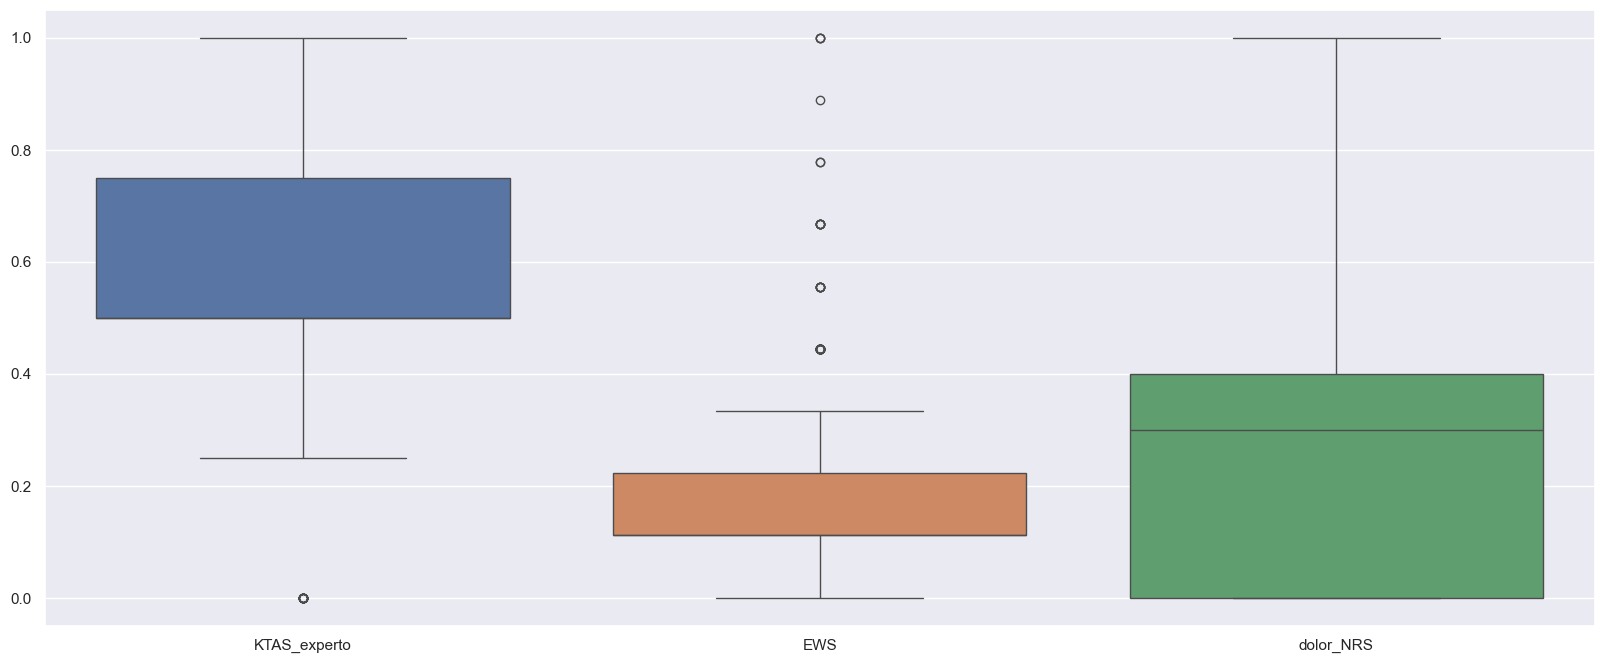

In [203]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=datos_prep_norm, orient="v") 

#### 4.1 Encontramos el número óptimo de clusters con el método del codo

El número k de clústeres es un hiperparámetro crucial en K-Means, ya que define la cantidad de grupos en los que se segmentarán los datos. Para encontrar el valor óptimo de k, se utiliza el método del codo, que evalúa la mejora en la reducción de la distancia interna de los clústeres a medida que se incrementa k. El punto donde la mejora se estabiliza, formando un "codo" en la gráfica, sugiere el valor adecuado de k.

In [204]:
def plot_distortion(data,
                    k_min=1, 
                    k_max=11,
                    ylabel = 'Distortion',
                    xlabel = 'Number of clusters',
                    title = 'Distortion Plot'):
    '''
    Graficar el codo de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    xlabel : string
        La etiqueta del eje x
    ylabel  string
        La etiqueta del eje y    
    title : string
        El titulo de la gráfica  
    '''
    distortions = []
    for i in range(k_min, k_max):
        km = KMeans(n_clusters=i,
                 init='k-means++',
                 n_init=10,
                 max_iter=300,
                 random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)
    plt.plot(range(k_min,k_max), distortions, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

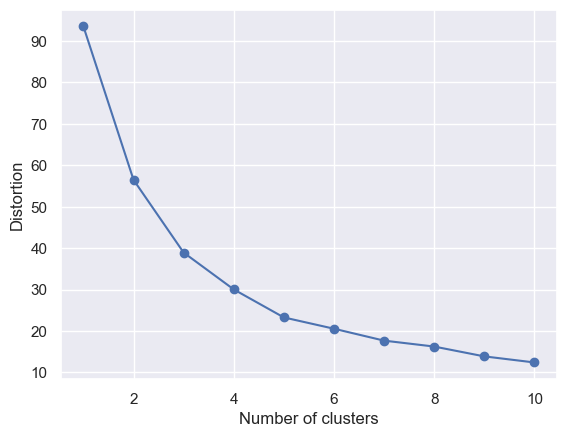

In [205]:
plot_distortion(datos_prep_norm,1,11)

#### 4.2 Construir el nuevo modelo con el número de clusters obtenido

In [206]:
N_clusters=2
kmeans = KMeans(n_clusters=N_clusters, random_state=0) 
kmeans = kmeans.fit(datos_prep_norm)

#### 4.3 Visualizar el resultado

#### 4.3.1 Graficar cantidad de registros por agrupación

<Axes: xlabel='Cluster'>

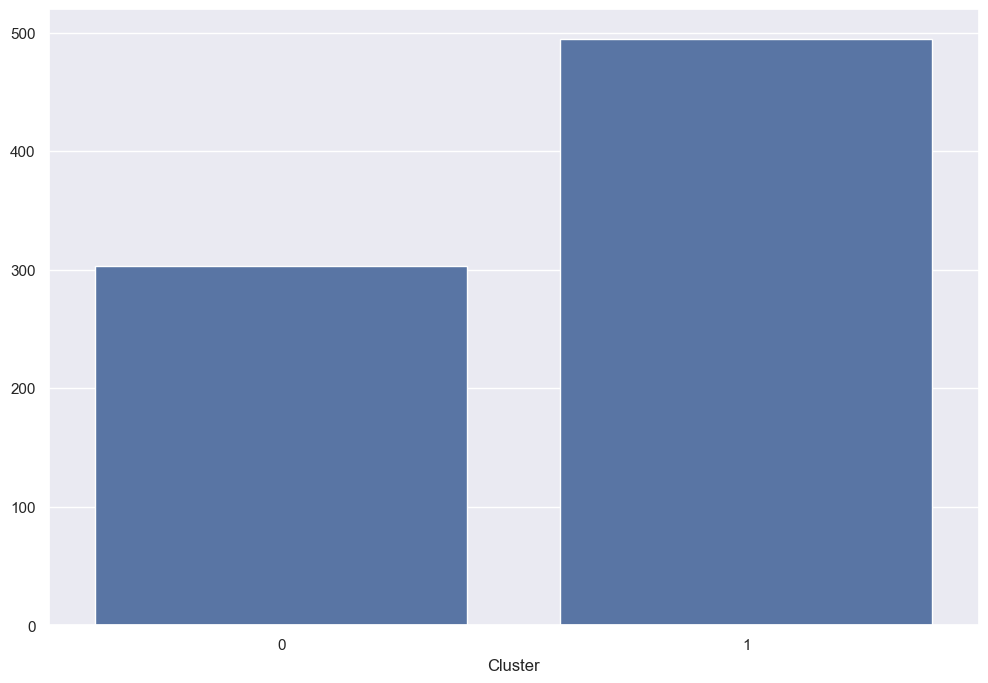

In [207]:
labels = kmeans.labels_
datos_prep_norm['Cluster'] = labels

cluster_distrib = datos_prep_norm['Cluster'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b')

In [208]:
cols_number = datos_prep_norm.to_numpy()
datos_prep_norm.groupby('Cluster').count()

,KTAS_experto,EWS,dolor_NRS
Cluster,,,
0,303,303,303
1,495,495,495


#### 4.3.2  Graficar comportamiento en parejas de atributos de acuerdo a la agrupación

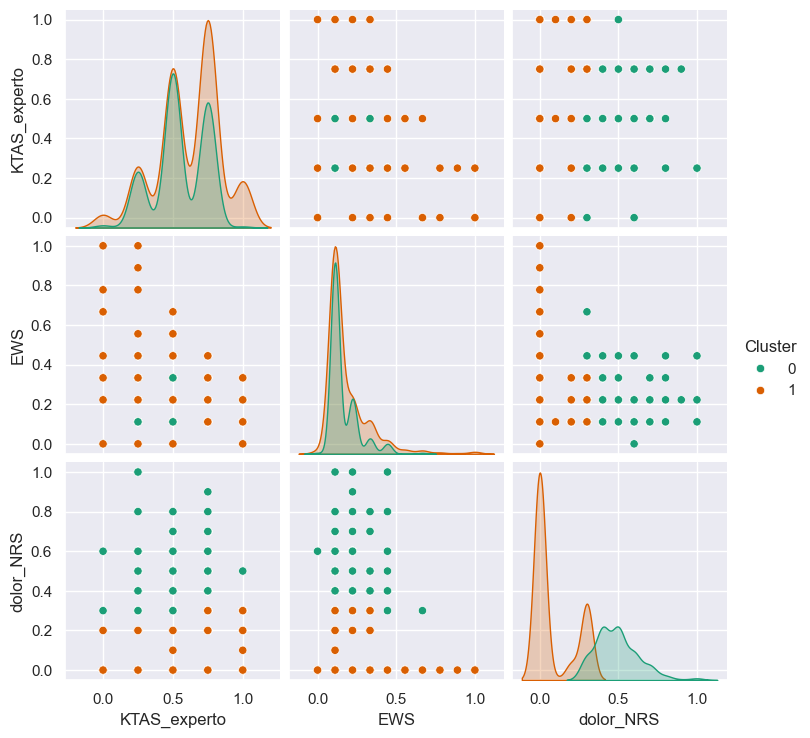

In [209]:
sns.pairplot(data=datos_prep_norm, hue="Cluster", palette="Dark2")

####  4.3.3  Graficar dos atributos y ver la relación con las agrupaciones

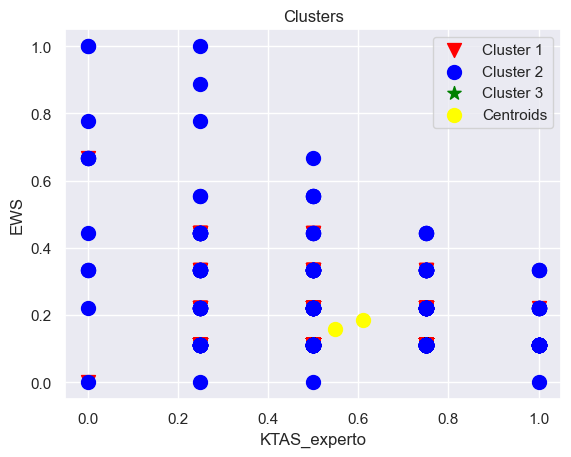

In [210]:
plt.scatter(cols_number[kmeans.labels_ == 0, 0], cols_number[kmeans.labels_ == 0, 1], s = 100, marker='v', c = 'red', label = 'Cluster 1')
plt.scatter(cols_number[kmeans.labels_ == 1, 0], cols_number[kmeans.labels_ == 1, 1], s = 100, marker='o', c = 'blue', label = 'Cluster 2')
plt.scatter(cols_number[kmeans.labels_ == 2, 0], cols_number[kmeans.labels_ == 2, 1], s = 100, marker='*', c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel(name_cols[0])
plt.ylabel(name_cols[1])
plt.legend()
plt.show()

#### 4.3.4 Evaluar la calidad de los clústeres obtenidos

In [211]:
def plot_silhouette(data, 
                    labels,
                   ylabel = 'Grupos',
                   xlabel = "Coeficiente de silueta",
                   title = 'Gráfica de silueta'):
    '''
    Graficar la silueta de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    labels : np.array
        El arreglo con las etiquetas correspondientes
    ylabel  string
        La etiqueta del eje y
    xlabel : string
        La etiqueta del eje x
    title : string
        El titulo de la gráfica        
    '''
    cluster_labels = np.unique(labels)
    print(cluster_labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data,
                                        labels,
                                        metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                        c_silhouette_vals,
                        height=1.0,
                        edgecolor='none',
                        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

[0 1]


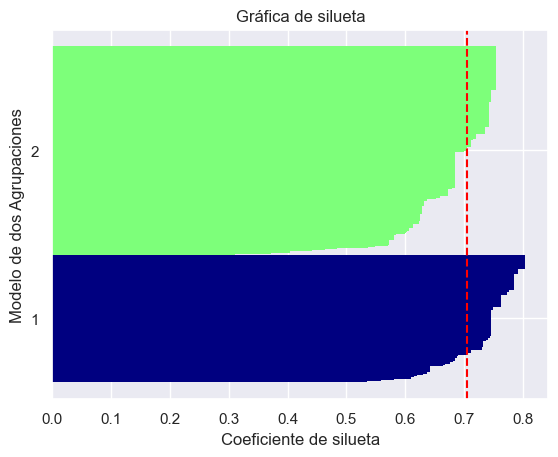

In [212]:
plot_silhouette(data = datos_prep_norm, 
                labels = kmeans.labels_, 
                ylabel = 'Modelo de dos Agrupaciones')

In [213]:
datos_cols_selec['Cluster'] = labels
datos_cols_selec.to_excel("./graficos/kmeans.xlsx")

Como podemos observar, nuestro modelo de dos agrupaciones nos da una gráfica de silueta relativamente buena, teniendo en cuenta que entre más cercano a 1 esté nuestro modelo en esta situación, mejor.

### Modelo con algoritmo DBSCAN

In [214]:
name_cols = ['KTAS_experto', 'EWS' ,'dolor_NRS']
datos_cols_selec = datos[name_cols].copy()

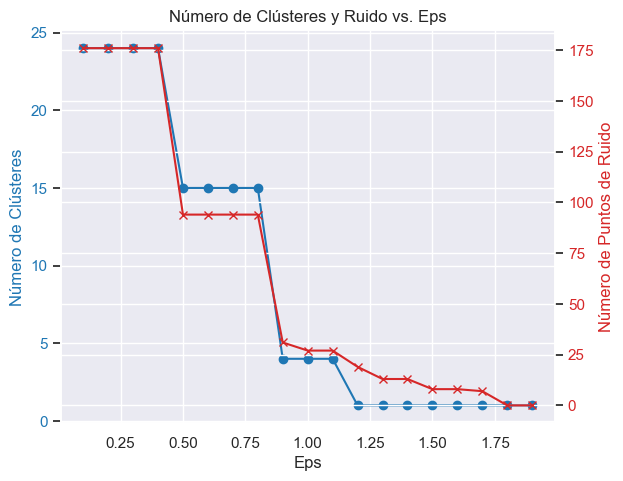

In [215]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

def plot_dbscan_eps(data, eps_min=0.1, eps_max=2.0, step=0.1, min_samples=5):
    '''
    Graficar el número de clústeres y ruido vs. eps en DBSCAN
    
    Parámetros
    ----------
    data : np.array
        El arreglo con los datos
    eps_min : float
        Valor mínimo para eps
    eps_max : float
        Valor máximo para eps
    step : float
        El incremento de eps en cada iteración
    min_samples : int
        Número mínimo de muestras para ser un punto central
    '''
    eps_values = np.arange(eps_min, eps_max, step)
    n_clusters = []
    n_noises = []

    for eps in eps_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        db.fit(data)
        
        labels = db.labels_
        # Número de clústeres (excluyendo el ruido, que es etiquetado como -1)
        n_clusters.append(len(set(labels)) - (1 if -1 in labels else 0))
        # Contar cuántos puntos fueron etiquetados como ruido (-1)
        n_noises.append(list(labels).count(-1))
    
    # Graficar el número de clústeres y puntos de ruido
    fig, ax1 = plt.subplots()

    color = 'tab:blue'
    ax1.set_xlabel('Eps')
    ax1.set_ylabel('Número de Clústeres', color=color)
    ax1.plot(eps_values, n_clusters, marker='o', color=color, label='Número de Clústeres')
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Número de Puntos de Ruido', color=color)
    ax2.plot(eps_values, n_noises, marker='x', color=color, label='Número de Ruido')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title('Número de Clústeres y Ruido vs. Eps')
    plt.show()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(datos_cols_selec)
plot_dbscan_eps(df_scaled, eps_min=0.1, eps_max=2, step=0.1, min_samples=10)


In [216]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Escalar los datos para normalizar distancias (recomendado para DBSCAN)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(datos_cols_selec)


In [217]:

# Crear el modelo DBSCAN con los parámetros: eps y min_samples
dbscan = DBSCAN(eps=1, min_samples=10)

# Ajustar el modelo a los datos escalados
dbscan.fit(datos_cols_selec)

print(pd.DataFrame(dbscan.labels_).value_counts())

0 
 0    771
-1     27
Name: count, dtype: int64


In [218]:

# Agregar las etiquetas al DataFrame
datos_cols_selec['cluster'] = dbscan.labels_

# Mostrar los resultados
print(datos_cols_selec['cluster'].value_counts())


cluster
 0    771
-1     27
Name: count, dtype: int64


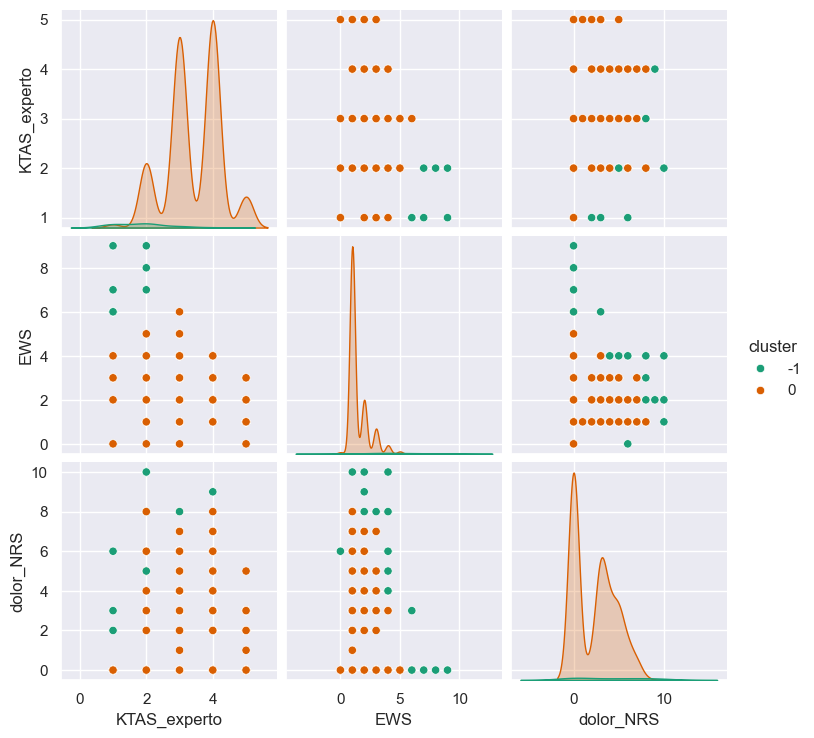

In [219]:
sns.pairplot(data=datos_cols_selec, hue="cluster", palette="Dark2")

[-1  0]


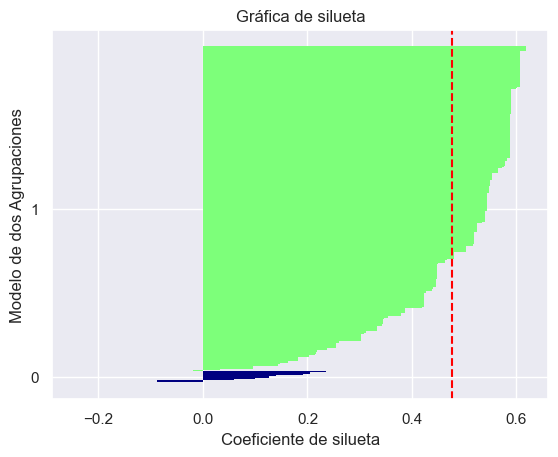

In [220]:
plot_silhouette(data = datos_cols_selec, 
                labels = dbscan.labels_, 
                ylabel = 'Modelo de dos Agrupaciones')

In [221]:
name_cols = [ "Grupo", 
              "Disposicion",
              "KTAS_experto",
              "EWS",
              "dolor_NRS"]
name_cols = ['KTAS_experto', 'dolor_NRS', 'EWS']
datos_cols_selec = datos[name_cols].copy()


In [222]:
mms = MinMaxScaler()


datos_prep_norm = datos_cols_selec.copy()
datos_prep_norm[name_cols] = mms.fit_transform(datos_cols_selec[name_cols])
datos_prep_norm=datos_prep_norm[name_cols]
saved_cols = datos_prep_norm.columns

datos_prep_norm = pd.DataFrame(datos_prep_norm, columns =saved_cols)
print(datos_prep_norm.head())

   KTAS_experto  dolor_NRS       EWS
1          0.50        0.4  0.111111
2          0.75        0.3  0.222222
3          0.50        0.4  0.111111
4          0.25        0.0  0.444444
6          0.50        0.6  0.111111


### Modelo con algoritmo aglomerative clustering

In [223]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

def plot_agglomerative_clusters(data, k_min=2, k_max=10, linkage_method='ward'):
    '''
    Graficar el número de clústeres usando Agglomerative Clustering
    
    Parámetros
    ----------
    data : np.array
        El arreglo con los datos
    k_min : int
        Valor mínimo para n_clusters
    k_max : int
        Valor máximo para n_clusters
    linkage_method : string
        El método de linkage que debe usar (ward, single, complete, average)
    '''
    cluster_counts = []
    
    for n_clusters in range(k_min, k_max + 1):
        # Crear el modelo de Agglomerative Clustering
        agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
        
        # Ajustar el modelo a los datos
        agg_clustering.fit(data)
        # Almacenar el número de clústeres formados
        cluster_counts.append(silhouette_score(data, agg_clustering.labels_))
    
    # Graficar el número de clústeres
    plt.plot(range(k_min, k_max + 1), cluster_counts, marker='o')
    plt.xlabel('Número de Clústeres (k)')
    plt.ylabel('Silueta')
    plt.title(f'Agglomerative Clustering con {linkage_method.capitalize()} Linkage')
    plt.show()


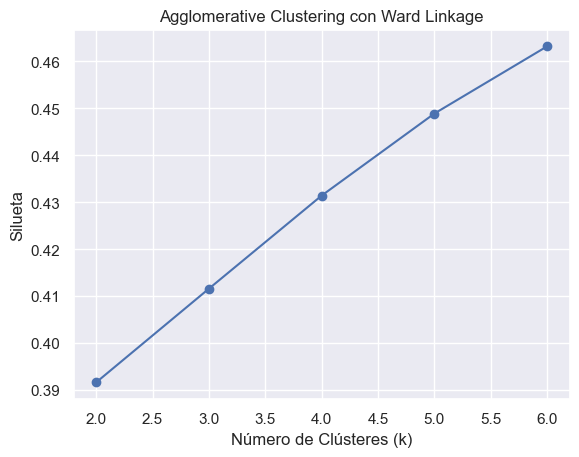

In [224]:

# Usar la función para graficar el número de clústeres formados
plot_agglomerative_clusters(datos_prep_norm, k_min=2, k_max=6, linkage_method='ward')


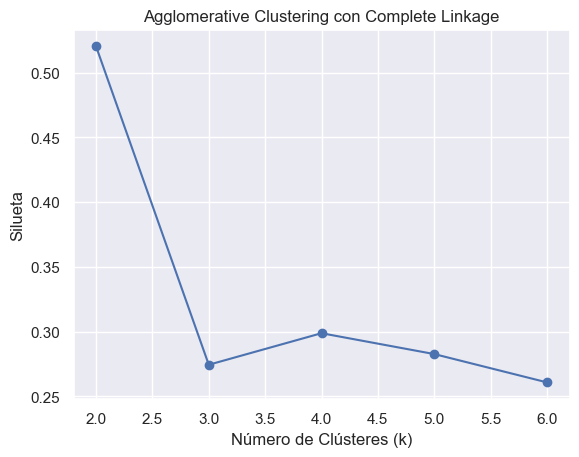

In [225]:
plot_agglomerative_clusters(datos_prep_norm, k_min=2, k_max=6, linkage_method='complete')


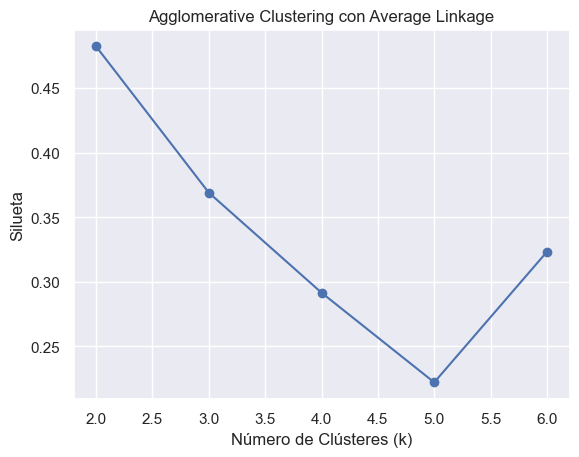

In [226]:
plot_agglomerative_clusters(datos_prep_norm, k_min=2, k_max=6, linkage_method='average')


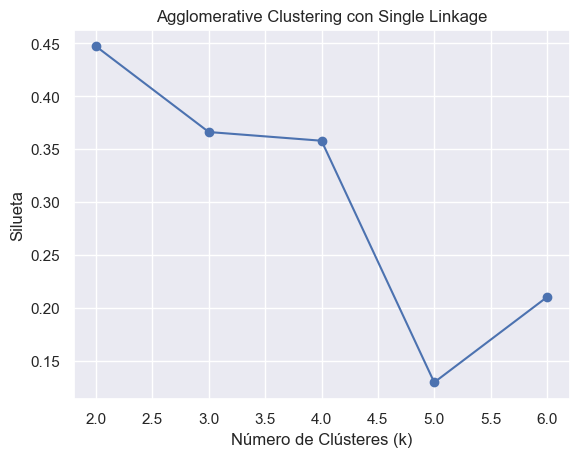

In [227]:
plot_agglomerative_clusters(datos_prep_norm, k_min=2, k_max=6, linkage_method='single')


In [228]:
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
        
# Ajustar el modelo a los datos
agg_clustering.fit(datos_prep_norm)



AgglomerativeClustering(n_clusters=3)

In [229]:
# Agregar las etiquetas al DataFrame
datos_prep_norm['cluster'] = agg_clustering.labels_

# Mostrar los resultados
print(datos_prep_norm['cluster'].value_counts())

cluster
0    402
1    259
2    137
Name: count, dtype: int64


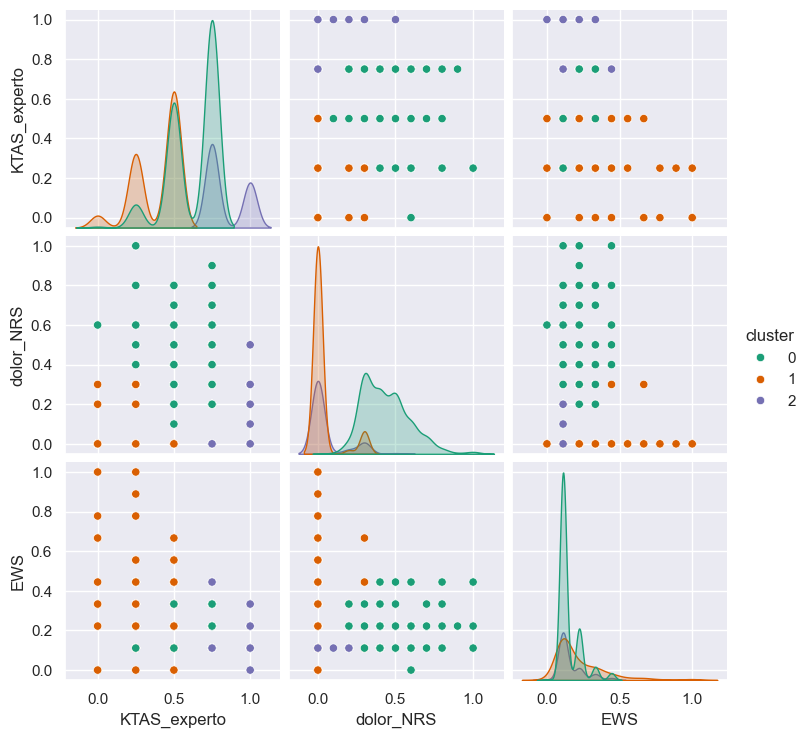

In [230]:
sns.pairplot(data=datos_prep_norm, hue="cluster", palette="Dark2")

In [231]:
silhouette_avg = silhouette_score(datos_prep_norm, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3239477710604445


[0 1 2]


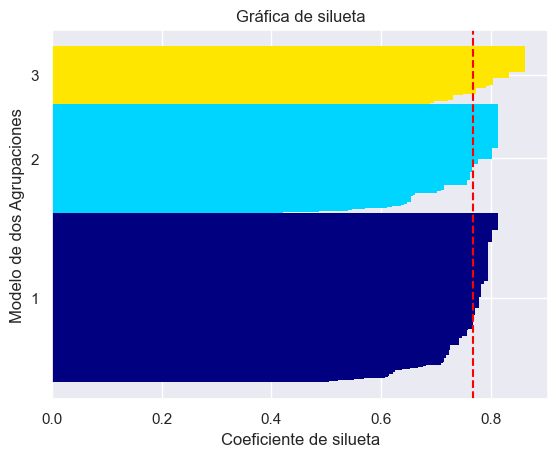

In [232]:
plot_silhouette(data = datos_prep_norm, 
                labels = agg_clustering.labels_, 
                ylabel = 'Modelo de dos Agrupaciones')

## 5. Análisis y conclusiones

| **Modelo**               | **Ventajas**                                                                                                                                           | **Desventajas**                                                                                                               | **Coeficiente de Silueta**                           | **Observaciones**                                                                                           |
|--------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------|------------------------------------------------------------------------------------------------------------|
| **AgglomerativeClustering** | Buena cohesión interna en algunos grupos, con coeficientes de silueta cercanos a 0.8. Ideal para datos jerárquicos o cuando se desconoce el número de clústeres. | Presenta registros con coeficientes de silueta por debajo de 0.6, indicando mala asignación. Requiere gran cantidad de datos. | Varía entre 0.4 y 0.8 en diferentes grupos.         | Se observan algunos puntos atípicos o mal agrupados. Requiere ajuste o limpieza de datos para mejorar resultados. |
| **DBSCAN**               | Identifica bien puntos atípicos y es útil para datos con forma arbitraria. No requiere especificar el número de clústeres.                                | Coeficientes negativos en algunos puntos indican mala agrupación. Sensible a la selección de parámetros como epsilon.         | Coeficiente máximo alrededor de 0.4.                | Mala asignación en clústeres, especialmente en el grupo 2, con coeficientes negativos. Puntos atípicos detectados. |
| **KMeans**               | Rápido y eficiente para datos con clústeres bien definidos. Mayor cohesión entre grupos, con coeficientes de silueta alrededor de 0.7.                     | Sensible a valores iniciales de centroides y la elección de k. Algunos registros mal agrupados, coeficientes inferiores a 0.6. | Coeficiente promedio cercano a 0.7.                 | Mejor desempeño que los otros dos modelos, aunque persisten algunos puntos mal agrupados. Ajuste de k es crítico. |

A nivel cuantitativo en el último modelo, correspondiente a **AgglomerativeClustering**, se observa un coeficiente de silueta cercano a **0.8**, indicando una buena cohesión en general, aunque en el grupo 1 (azul oscuro) y el grupo 2 (celeste) hay registros con coeficientes por debajo de **0.6**, lo que sugiere posibles valores atípicos o mala asignación. El segundo modelo **DBSCAN**, muestra un coeficiente de silueta moderado, cercano a **0.4** para el grupo 1 (verde), lo que indica una agrupación razonable pero con registros cercanos a **0.0**, sugiriendo mala asignación, especialmente en el grupo 2 (azul oscuro), que presenta coeficientes negativos, lo que es preocupante y sugiere que estos registros están mal agrupados. Finalmente, en el primer modelo de **KMeans**, la mayoría de los registros tiene coeficientes cercanos a **0.7**, lo que indica una buena agrupación, aunque en el grupo 1 (verde) y el grupo 2 (azul oscuro) hay registros con coeficientes inferiores a **0.6**, lo que también indica posibles atípicos o mala asignación de ciertos puntos.

A nivel cualitativo, aunque seleccionamos las variables **EWS**, **DOLOR_NRS** y **KTAS_Experto** porque inicialmente parecían mostrar correlaciones útiles para agrupar a los pacientes de manera coherente, los resultados de los modelos de agrupación sugieren lo contrario. Si bien era razonable esperar que un peor **EWS** y un mayor nivel de dolor se relacionaran con un peor registro en **KTAS_Experto**, los resultados muestran que esta relación no es consistente en los datos. El análisis mediante **AgglomerativeClustering**, **DBSCAN** y **KMeans** confirma que los datos son muy dispersos y no presentan clústeres naturales claramente diferenciados. En **AgglomerativeClustering**, aunque algunos grupos tienen un coeficiente de silueta alto, existen registros con mala cohesión. **DBSCAN** destaca la presencia de puntos atípicos y agrupaciones inconsistentes, con coeficientes negativos y cercanos a cero, indicando que el modelo no es capaz de captar patrones claros. Por último, **KMeans** presenta grupos más coherentes, pero todavía con registros mal asignados o atípicos. 

En conclusión, después de probar múltiples modelos, los algoritmos de agrupación no parecen ofrecer un valor significativo para la toma de decisiones rápidas en el hospital, ya que no logran identificar patrones claros y consistentes en los datos que puedan ser útiles para la clasificación de pacientes y optimización de decisiones en el mismo.